IN THIS NOTEBOOK, CORRELATION ANALYSIS BETWEEN EACH OF THE TARGET SPEECH FEATURES (MFCC, X-VECTOR AND EMBEDDING), AND SILHOUETTE SCORES, ARE CONDUCTED

STEP 1: load and preprocess data

In [ ]:
#load the data
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

loaded_features_df = pd.read_pickle('/content/drive/MyDrive/Speaker_diarization_project_data/data_processed_cos_sim.pkl')

STEP 2: prepare data on both speaker level and sample level for further analysis

STEP 2.1: prepare MFCCs and MFCC-based silhouette scores

In [ ]:
#get the speaker level silhouette score based on mfcc
#prepare mfccs
import numpy as np
mfccs = [mfcc for row in loaded_features_df['mean_mfcc_segments'] for mfcc in row]

mfccs = np.array(mfccs)

In [ ]:
#prepare labels to assist computation
label_df = pd.read_csv('/content/drive/MyDrive/Speaker_diarization_project_data/selected_segments.csv')

label_df['full_label'] = label_df['file_name'] + '_' + label_df['speaker']
label_per_sample = label_df['full_label'].values

In [ ]:
#calculate silhouette score based on mfcc
from sklearn.metrics import silhouette_samples

silhouette_speaker_mfcc = []

sil_per_sample_m = silhouette_samples(mfccs,label_per_sample)

for speaker_label in np.unique(label_per_sample):
  sil_per_speaker = sil_per_sample_m[label_per_sample == speaker_label]
  sil_speaker = np.mean(sil_per_speaker)
  silhouette_speaker_mfcc.append(sil_speaker)

In [ ]:
#define the samplewise data for later analysis based on each sample

mfcc_vec_per_sam = mfccs
mfcc_val_per_sam = np.mean(mfccs,axis=1)

sil_mfcc_per_sam = sil_per_sample_m

STEP 2.2: prepare xvectors and xvector-based silhouette scores

In [ ]:
#obtain the speaker level xvector silhouette score

#prepare xvectors
xvectors = [xvector for row in loaded_features_df['xvectors'] for xvector in row]

xvectors = np.array(xvectors)
xvectors=np.squeeze(xvectors, axis=1)

In [ ]:
#calculate xvector silhouette score

silhouette_speaker_xvector = []
sil_per_sample_x = silhouette_samples(xvectors,label_per_sample)

for speaker_label in np.unique(label_per_sample):
  sil_per_speaker = sil_per_sample_x[label_per_sample == speaker_label]
  sil_speaker = np.mean(sil_per_speaker)
  silhouette_speaker_xvector.append(sil_speaker)

In [ ]:
#define the samplewise data for later analysis

xvector_per_sam = np.mean(xvectors,axis=1)
sil_xvector_per_sam = sil_per_sample_x

STEP 2.3: prepare embeddings and embedding-based silhouette scores

In [ ]:
#get the speaker level silhouette score based on embedding

def calculate_mean_embedding(embeddings):
    mean_embedding_seg = []
    for embedding_per_segment in embeddings:
        mean_embedding = np.mean(embedding_per_segment, axis=0)
        mean_embedding_seg.append(mean_embedding)
    return mean_embedding_seg

def calculate_mean_speaker_emb(embeddings):

    mean_speaker_emb_vector = np.mean(embeddings,axis=0)
    mean_speaker_emb_value = np.mean(mean_speaker_emb_vector)

    return mean_speaker_emb_value

loaded_features_df['mean_embedding_segments'] = loaded_features_df['embeddings'].apply(calculate_mean_embedding)
loaded_features_df['mean_speaker_emb_value'] = loaded_features_df['mean_embedding_segments'].apply(calculate_mean_speaker_emb)

add_mean_embedding_df = pd.DataFrame(loaded_features_df)

embeddings = [embedding for row in loaded_features_df['mean_embedding_segments'] for embedding in row]
speaker_embeddings = [embedding for embedding in loaded_features_df['mean_speaker_emb_value']]
embeddings = np.array(embeddings)


In [ ]:
#calculate the embedding silhauette score
silhouette_speaker_emb = []

sil_per_sample_e = silhouette_samples(embeddings,label_per_sample)

for speaker_label in np.unique(label_per_sample):
  sil_per_speaker = sil_per_sample_e[label_per_sample == speaker_label]
  sil_speaker = np.mean(sil_per_speaker)
  silhouette_speaker_emb.append(sil_speaker)


In [ ]:
#define the samplewise data for later analysis based on each sample

embedding_per_sam = np.mean(embeddings,axis=1)
sil_embedding_per_samp = sil_per_sample_e

STEP 3: speaker level correlation analysis

STEP 3.1: conduct speaker level correlation analysis between MFCC coefficients and MFCC-based silhouette scores

In [ ]:
#prepare mfccs for speaker level correlatoin analysis

#coefficientwise
speaker_mfcc_vector = [data for data in loaded_features_df['speaker_mfcc_vector']]

#use mean mfcc values
speaker_mfcc = [data for data in loaded_features_df['speaker_mfcc_value']]

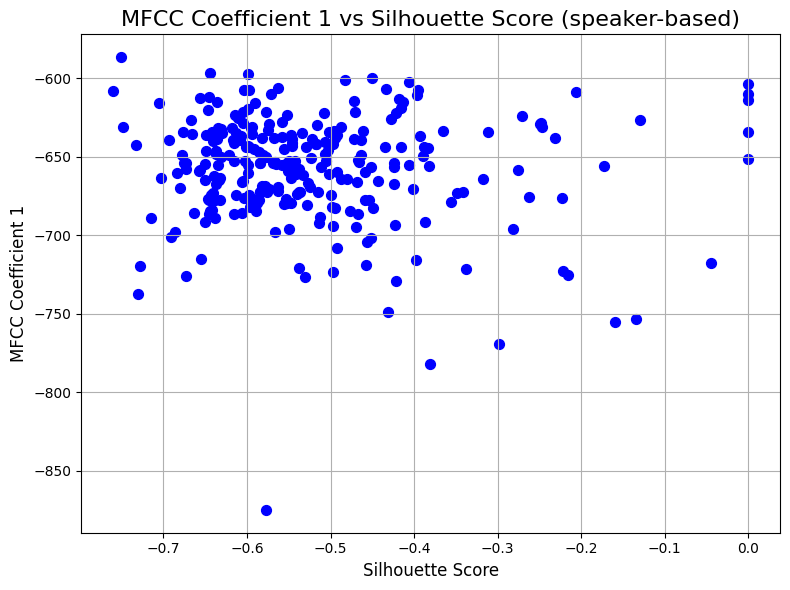

Linear correlation: -0.05792162630430086
Non-linear correlation: -0.02668230314480189


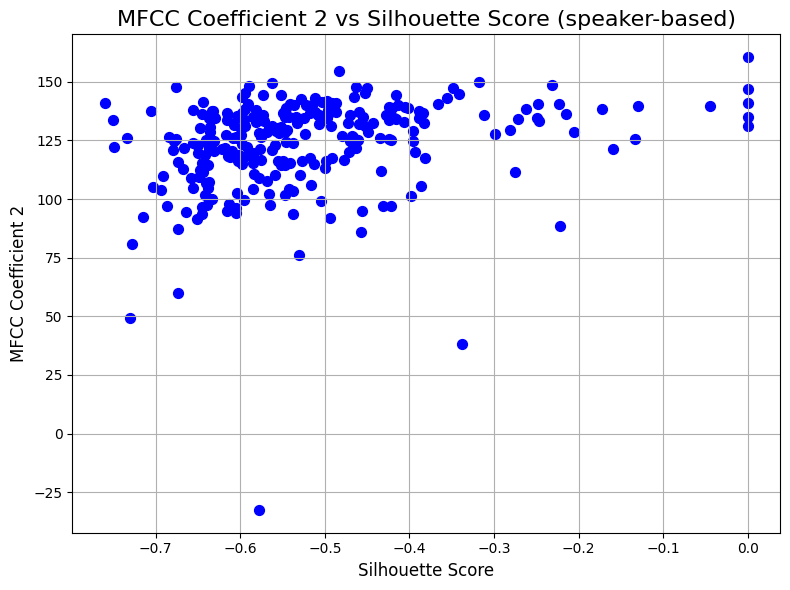

Linear correlation: 0.2770841904350599
Non-linear correlation: 0.3702498922245446


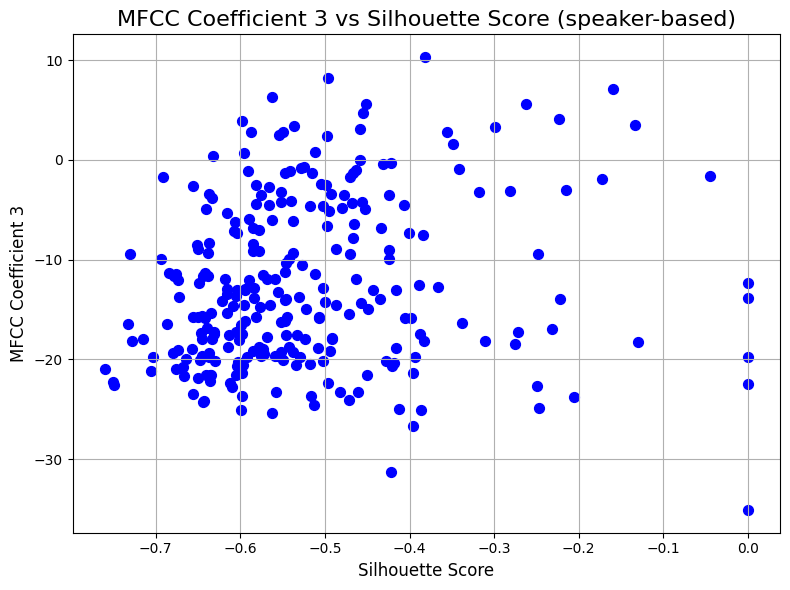

Linear correlation: 0.14276693198170012
Non-linear correlation: 0.19939222738504192


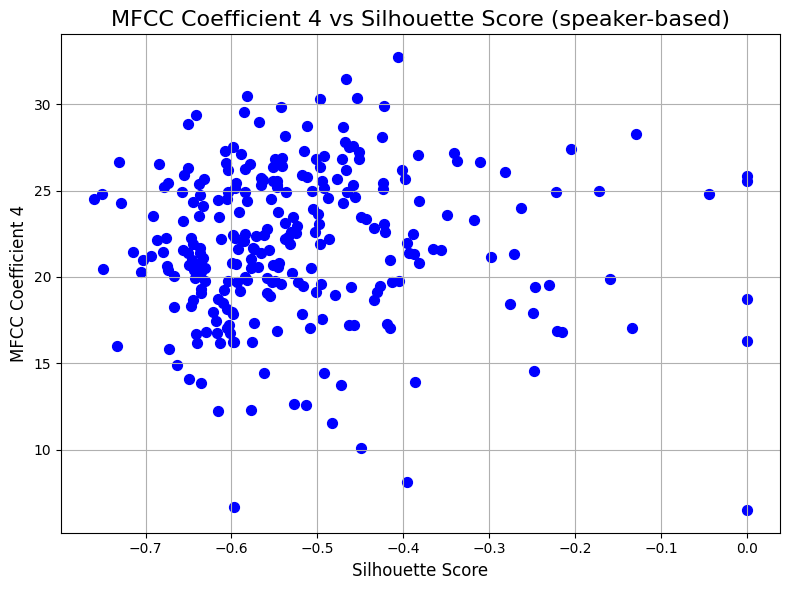

Linear correlation: 0.005564204118234538
Non-linear correlation: 0.11132669888474873


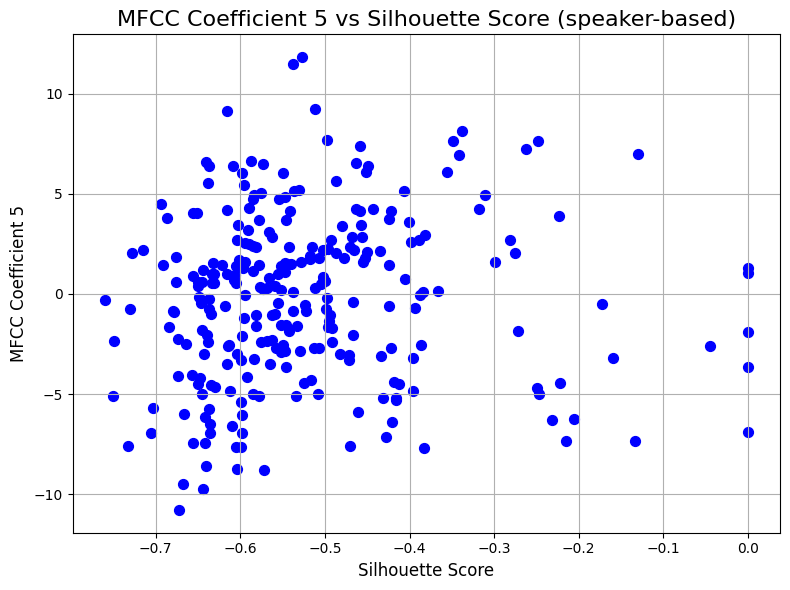

Linear correlation: 0.06825753708620189
Non-linear correlation: 0.14912195548495125


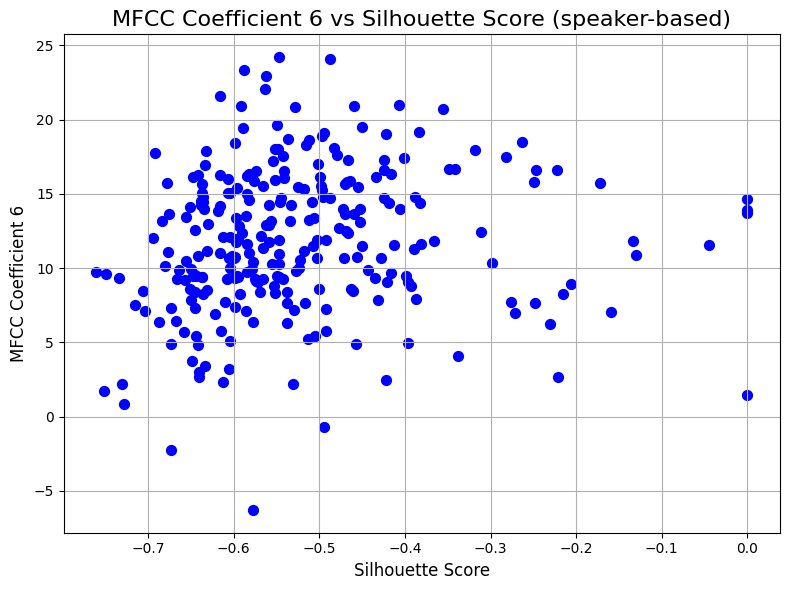

Linear correlation: 0.12591609136169854
Non-linear correlation: 0.21362604498699744


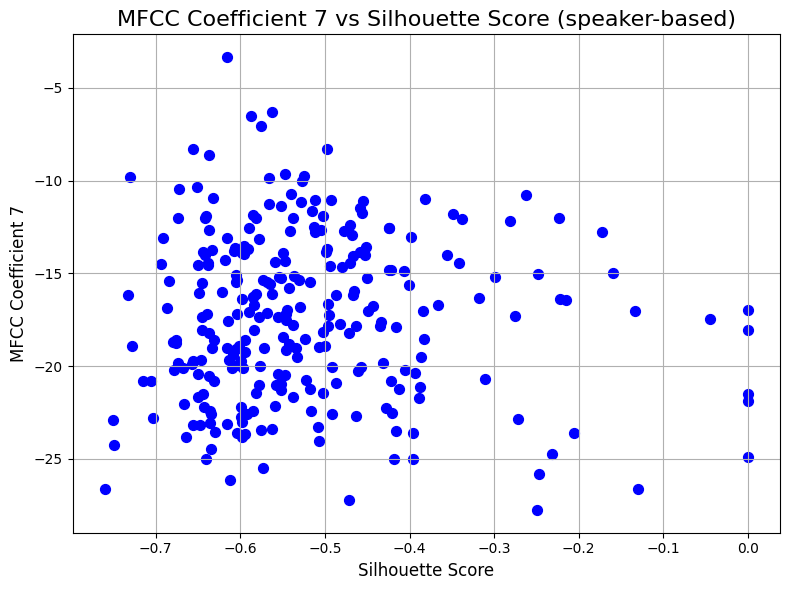

Linear correlation: -0.036639396424832785
Non-linear correlation: 0.0565095883971058


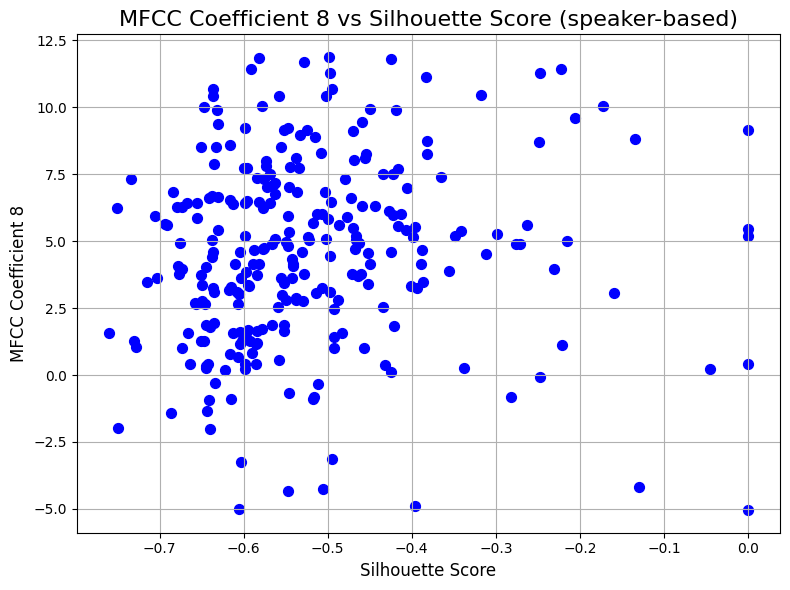

Linear correlation: 0.084662582694636
Non-linear correlation: 0.1768738901977571


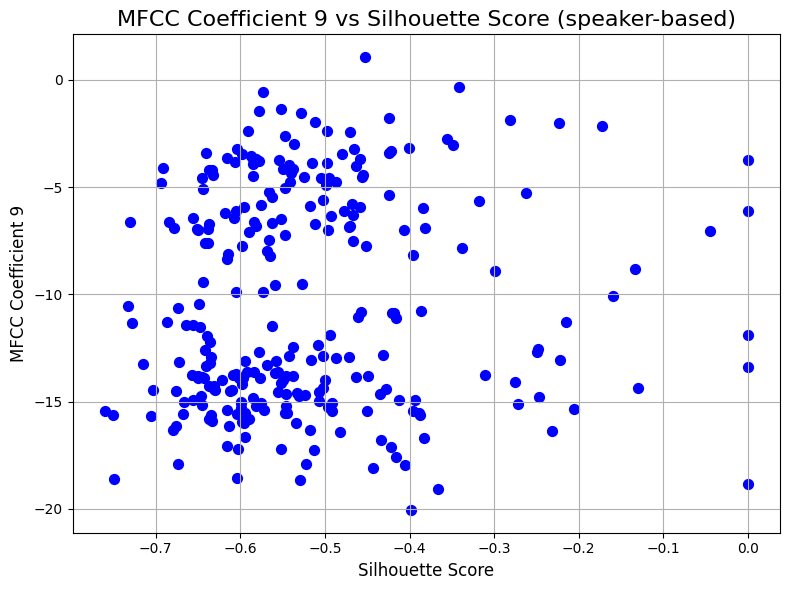

Linear correlation: 0.0774990966452331
Non-linear correlation: 0.11216841572180258


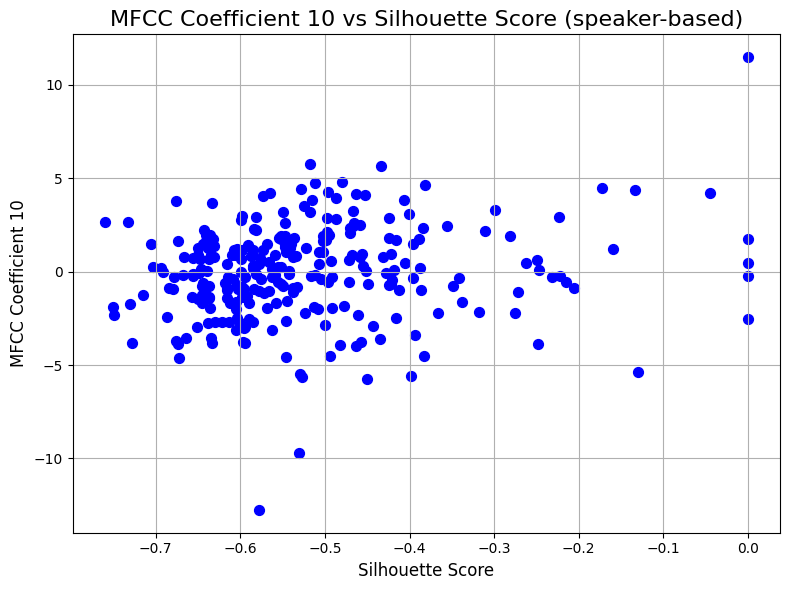

Linear correlation: 0.17193168314821233
Non-linear correlation: 0.17307289955249391


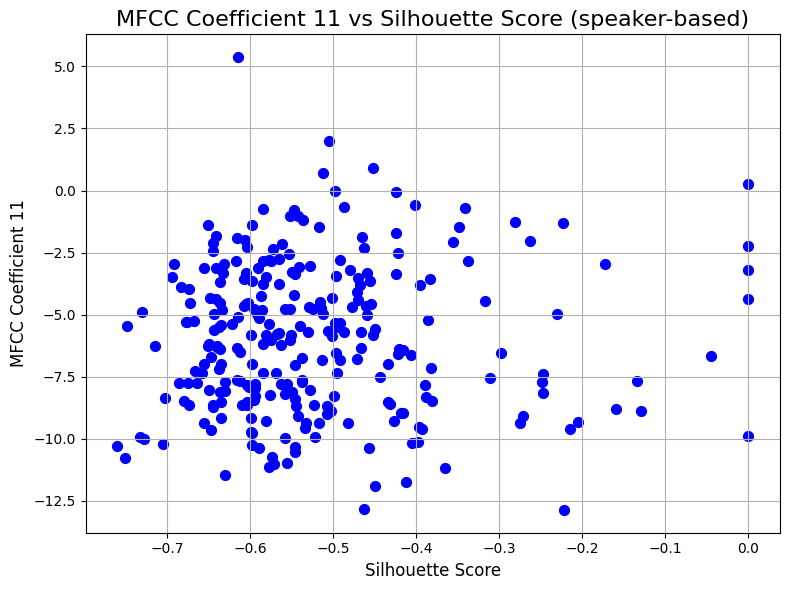

Linear correlation: 0.03454360570405063
Non-linear correlation: 0.02892165581874025


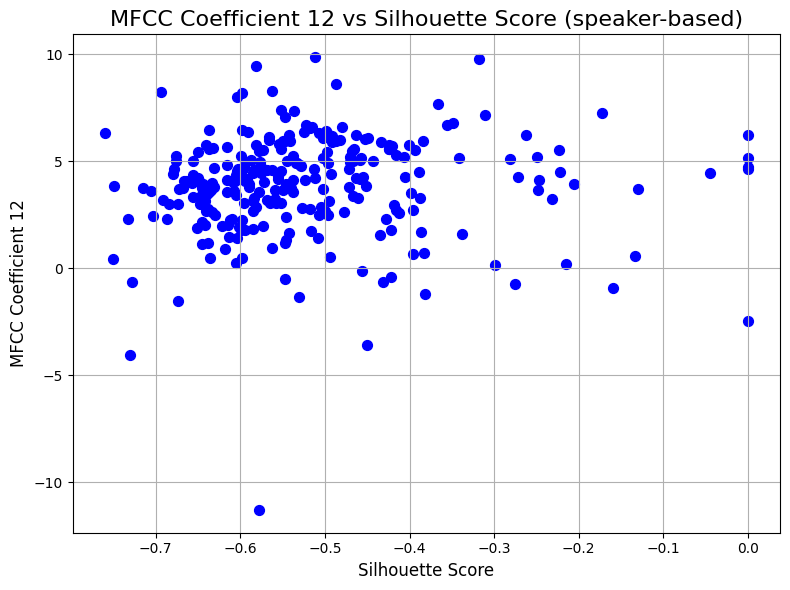

Linear correlation: 0.05064623697878124
Non-linear correlation: 0.16744798811060618


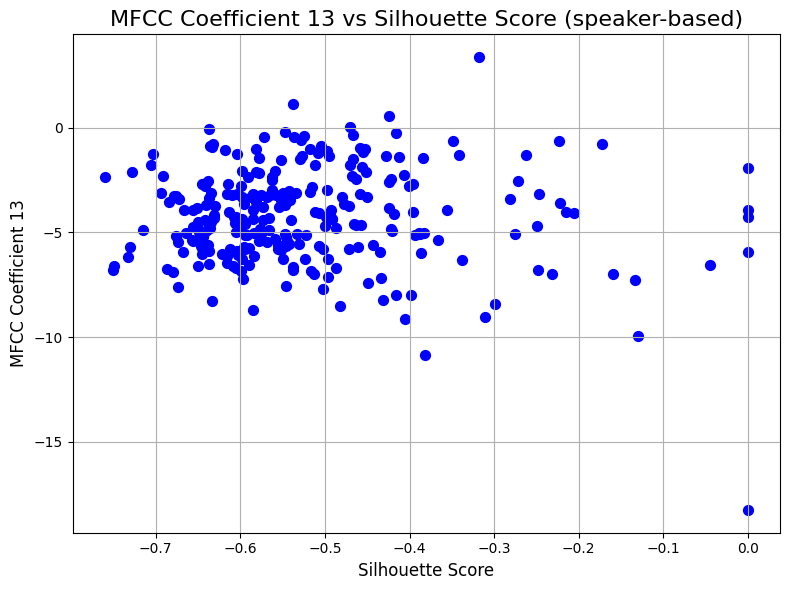

Linear correlation: -0.08091919999322954
Non-linear correlation: 0.0584498783553001


In [40]:
#plot the mfccs and the mfcc based silhouette scores
#13 plots for 13 coefficients
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

speaker_mfcc_vector = np.array(speaker_mfcc_vector)
silhouette_speaker_mfcc = np.array(silhouette_speaker_mfcc)

for coeff_idx in range(13):
    plt.figure(figsize=(8, 6))

    plt.scatter(silhouette_speaker_mfcc, speaker_mfcc_vector[:, coeff_idx], color='b', s=50)

    plt.title(f"MFCC Coefficient {coeff_idx + 1} vs Silhouette Score (speaker-based)", fontsize=16)
    plt.xlabel("Silhouette Score", fontsize=12)
    plt.ylabel(f"MFCC Coefficient {coeff_idx + 1}", fontsize=12)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

#calculate the linear correlation level (pearson correlation)
    pearson_corr, pearson_p_value = pearsonr(speaker_mfcc_vector[:, coeff_idx], silhouette_speaker_mfcc)
    print(f'Linear correlation: {pearson_corr}')

#calculate the none-linear correlation level (spearman’s rank correlation)
    spearman_corr, spearman_p_value = spearmanr(speaker_mfcc_vector[:, coeff_idx], silhouette_speaker_mfcc)
    print(f"Non-linear correlation: {spearman_corr}")

STEP 3.2: conduct speaker level correlation analysis between mean MFCC value and MFCC-based silhouette scores

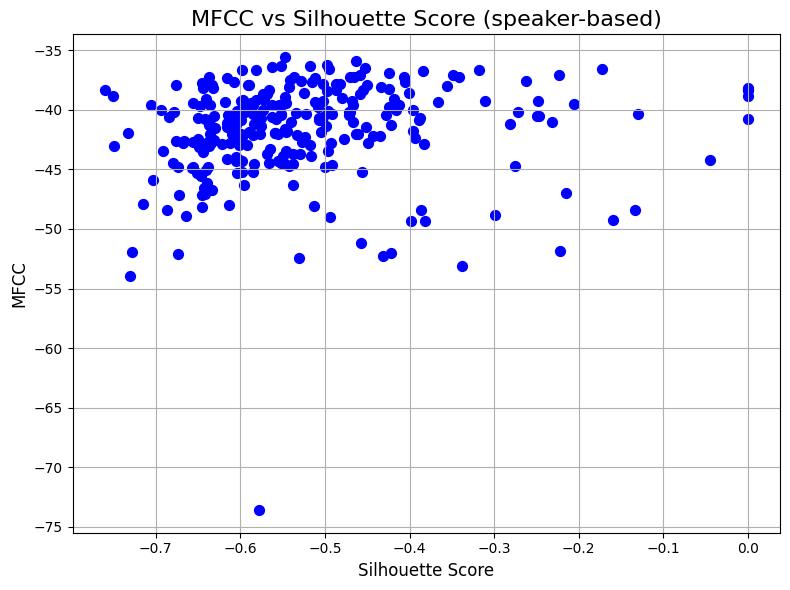

Linear correlation: 0.12259858421604758
Non-linear correlation: 0.24864713312925962


In [41]:
#plot the mfccs and the mfcc based silhouette scores
#one plot, based on one mean mfcc value per speaker
speaker_mfcc = np.array(speaker_mfcc)
silhouette_speaker_mfcc = np.array(silhouette_speaker_mfcc)

plt.figure(figsize=(8, 6))
plt.scatter(silhouette_speaker_mfcc, speaker_mfcc, color='b', s=50)

plt.title(f"MFCC vs Silhouette Score (speaker-based)", fontsize=16)
plt.xlabel("Silhouette Score", fontsize=12)
plt.ylabel(f"MFCC", fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

#calculate the linear correlation level (pearson correlation)
pearson_corr, pearson_p_value = pearsonr(speaker_mfcc, silhouette_speaker_mfcc)
print(f'Linear correlation: {pearson_corr}')

#calculate the none-linear correlation level (spearman’s rank correlation)
spearman_corr, spearman_p_value = spearmanr(speaker_mfcc, silhouette_speaker_mfcc)
print(f"Non-linear correlation: {spearman_corr}")

STEP 3.3: conduct speaker level correlation analysis between mean xvector value and xvector-based silhouette scores

In [ ]:
#prepare xvectors for correlation analysis
speaker_xvector = [data for data in loaded_features_df['speaker_mean_xvector_value']]

(271,)


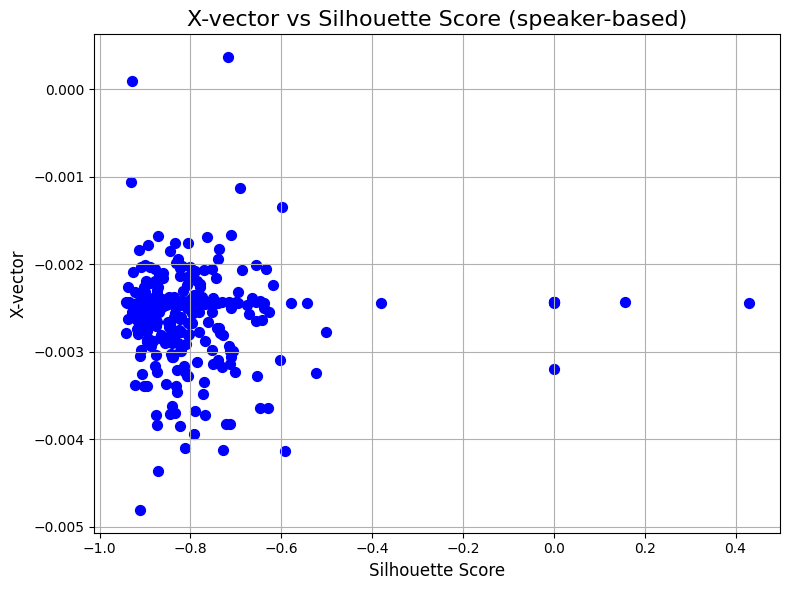

Linear correlation: 0.0015248151509815793
Non-linear correlation: -0.004249584718879255


In [42]:
#plot xvectors and the xvector based silhouette scores
#one plot, based on one mean xvector value per speaker
speaker_xvector = np.array(speaker_xvector)
silhouette_speaker_xvector = np.array(silhouette_speaker_xvector)
print(silhouette_speaker_xvector.shape)

plt.figure(figsize=(8, 6))
plt.scatter(silhouette_speaker_xvector, speaker_xvector, color='b', s=50)

plt.title(f"X-vector vs Silhouette Score (speaker-based)", fontsize=16)
plt.xlabel("Silhouette Score", fontsize=12)
plt.ylabel(f"X-vector", fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

#calculate the linear correlation level (pearson correlation)
speaker_xvector = np.squeeze(speaker_xvector)
pearson_corr, pearson_p_value = pearsonr(speaker_xvector, silhouette_speaker_xvector)
print(f'Linear correlation: {pearson_corr}')

#calculate the none-linear correlation level (spearman’s rank correlation)
spearman_corr, spearman_p_value = spearmanr(speaker_xvector, silhouette_speaker_xvector)
print(f"Non-linear correlation: {spearman_corr}")

STEP 3.4: conduct speaker level correlation analysis between mean embedding values and embedding-based silhouette scores

In [23]:
#prepare the embedding for correlation analysis
speaker_embeddings = speaker_embeddings
silhouette_speaker_embedding = silhouette_speaker_emb

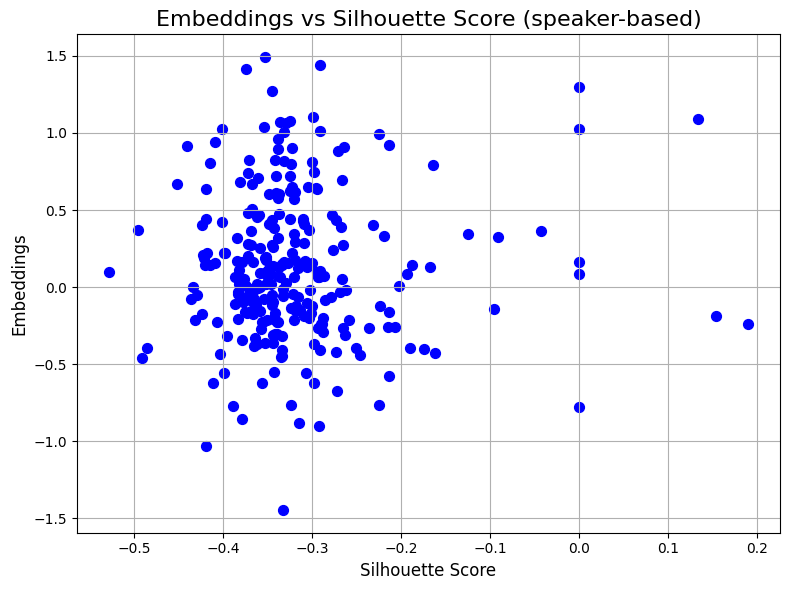

Linear correlation: 0.03229118596963368
Non-linear correlation: -0.01836100366902825


In [43]:
#plot embedding and embedding based silhouette scores
speaker_embeddings = np.array(speaker_embeddings)
silhouette_speaker_embedding = np.array(silhouette_speaker_embedding)
#print(silhouette_speaker_embedding.shape)
#print(speaker_embeddings.shape)

plt.figure(figsize=(8, 6))
plt.scatter(silhouette_speaker_embedding, speaker_embeddings, color='b', s=50)

plt.title(f"Embeddings vs Silhouette Score (speaker-based)", fontsize=16)
plt.xlabel("Silhouette Score", fontsize=12)
plt.ylabel(f"Embeddings", fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

#calculate the linear correlation level (pearson correlation)
speaker_xvector = np.squeeze(speaker_xvector)
pearson_corr, pearson_p_value = pearsonr(speaker_embeddings, silhouette_speaker_embedding)
print(f'Linear correlation: {pearson_corr}')

#calculate the none-linear correlation level (spearman’s rank correlation)
spearman_corr, spearman_p_value = spearmanr(speaker_embeddings, silhouette_speaker_embedding)
print(f"Non-linear correlation: {spearman_corr}")

STEP 4: sample level correlation analysis

STEP 4.1: conduct sample level correlation analysis between MFCC coefficients and MFCC-based silhouette scores

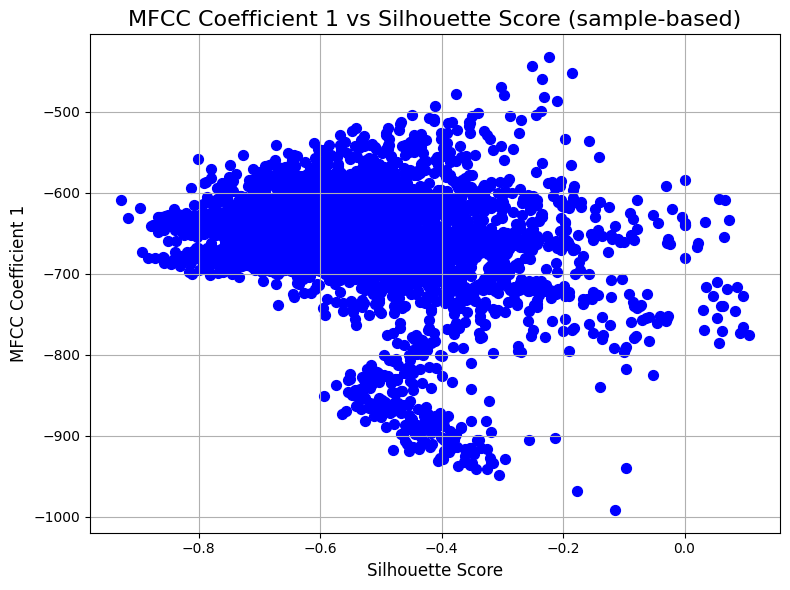

Linear correlation: -0.22973160228592515
Non-linear correlation: -0.1864784291215171


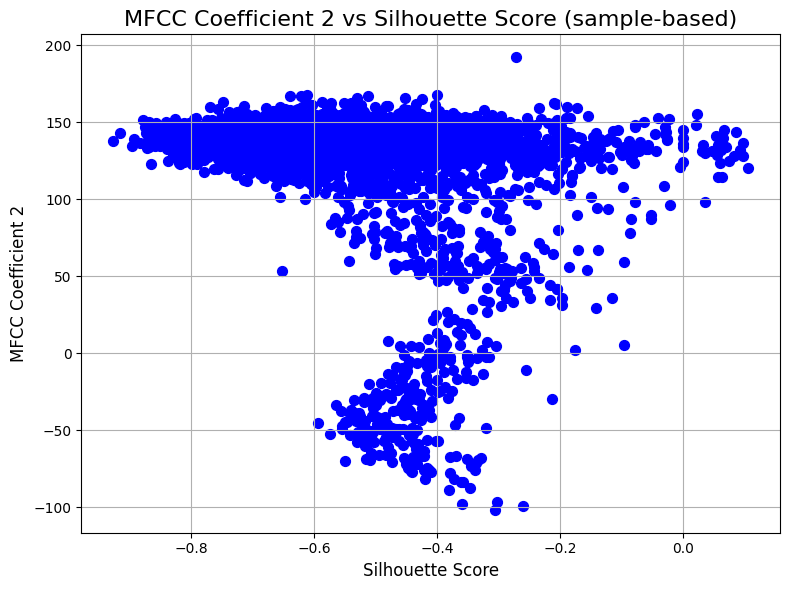

Linear correlation: -0.2566480722382076
Non-linear correlation: -0.2439257915065392


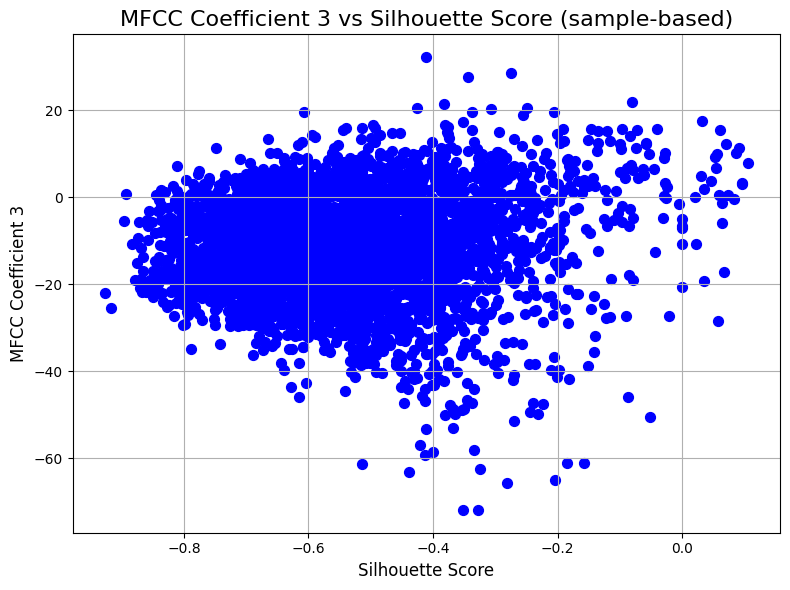

Linear correlation: 0.10060976637497283
Non-linear correlation: 0.0976537216932891


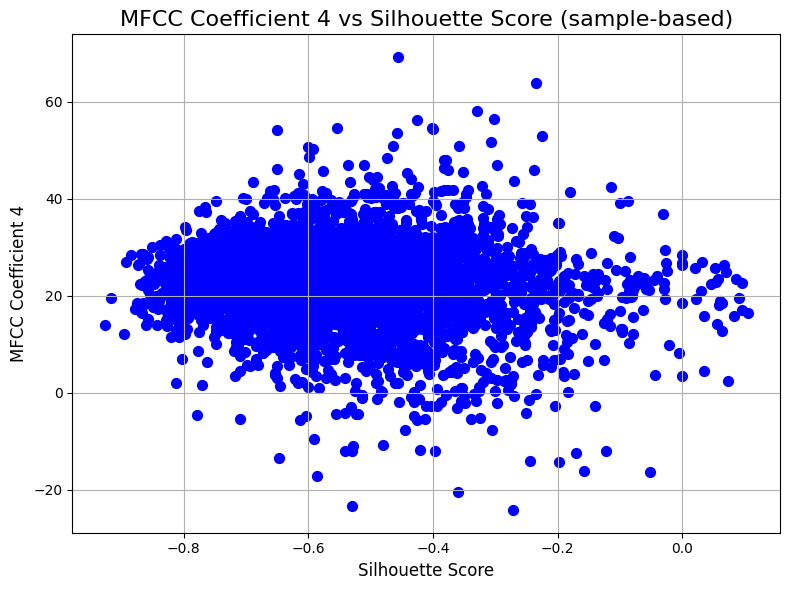

Linear correlation: -0.08399578509593938
Non-linear correlation: -0.053356816760571565


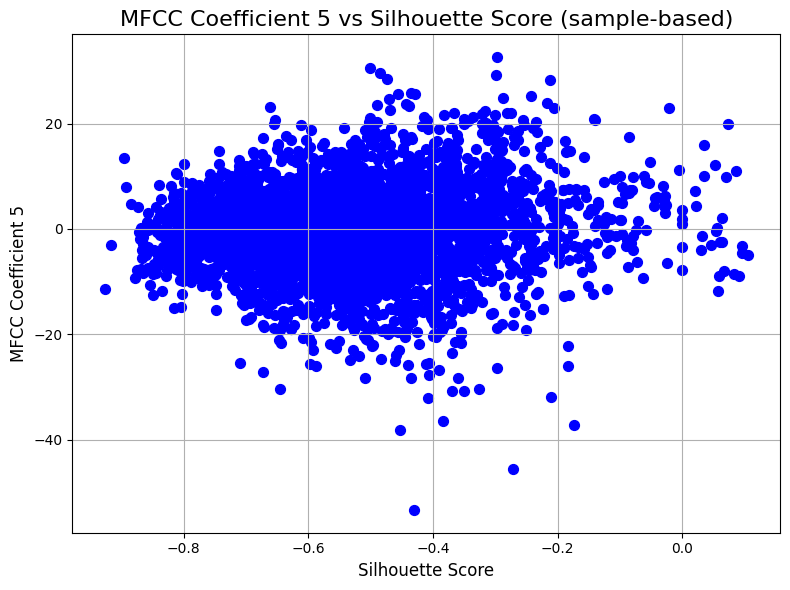

Linear correlation: 0.0801541951152868
Non-linear correlation: 0.07175627196936735


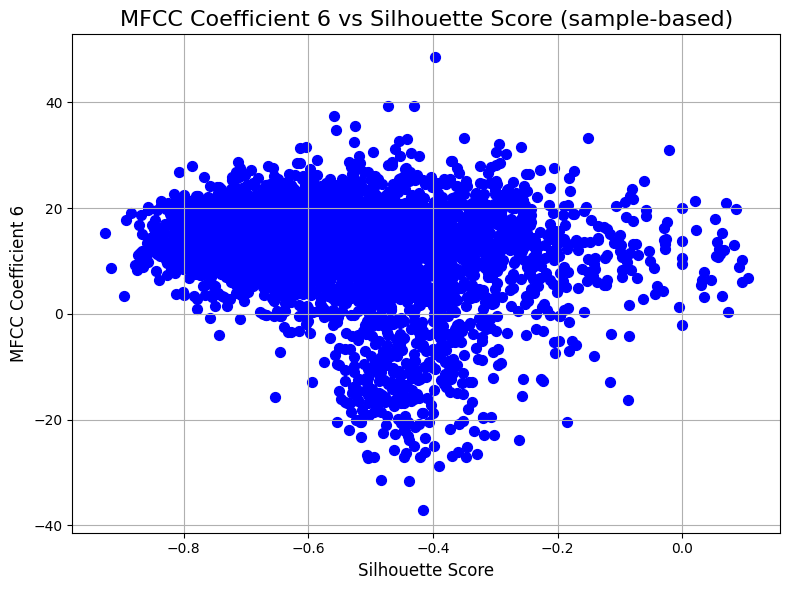

Linear correlation: -0.16969929941510098
Non-linear correlation: -0.12253344534159132


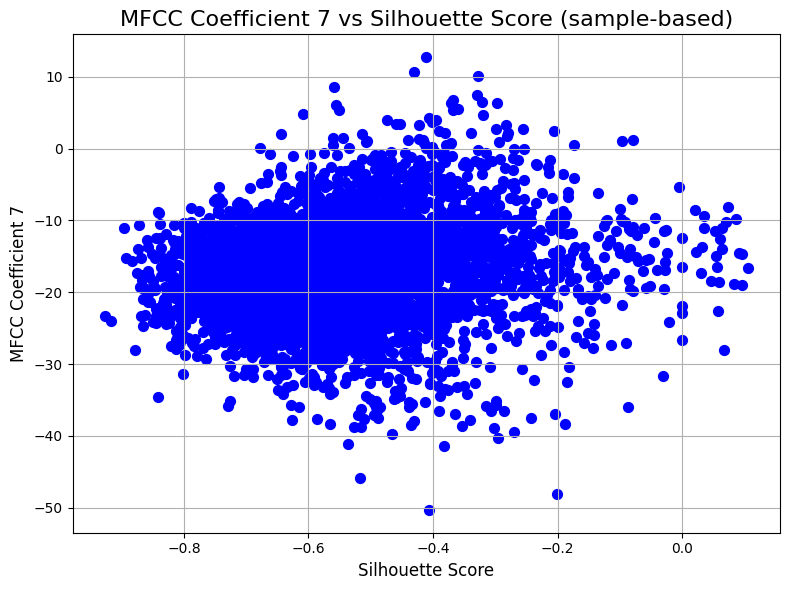

Linear correlation: 0.16144774592469213
Non-linear correlation: 0.18392876100647626


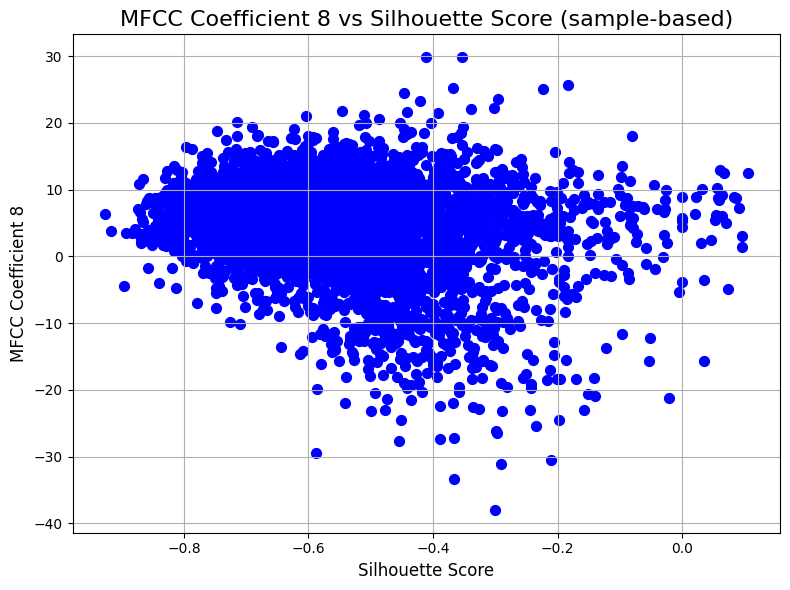

Linear correlation: -0.21116476066948367
Non-linear correlation: -0.18335302896120506


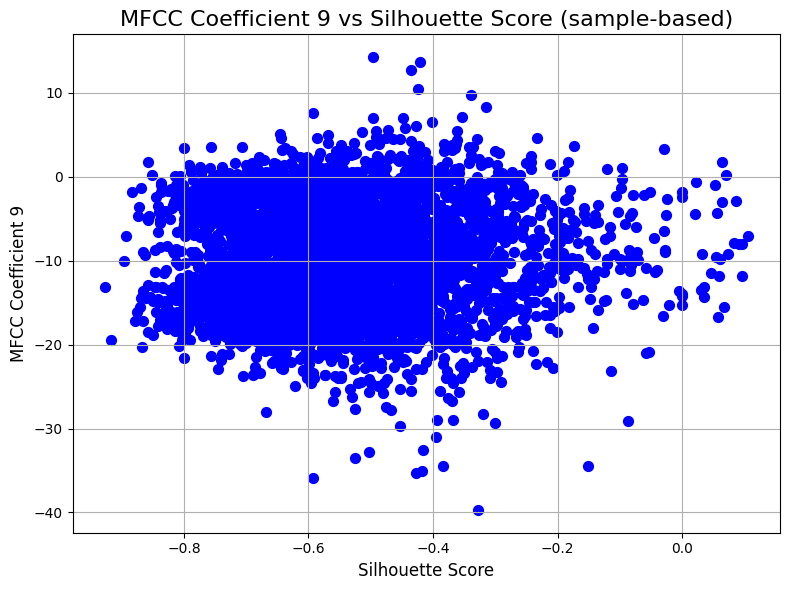

Linear correlation: 0.06999861623301228
Non-linear correlation: 0.08054810832701643


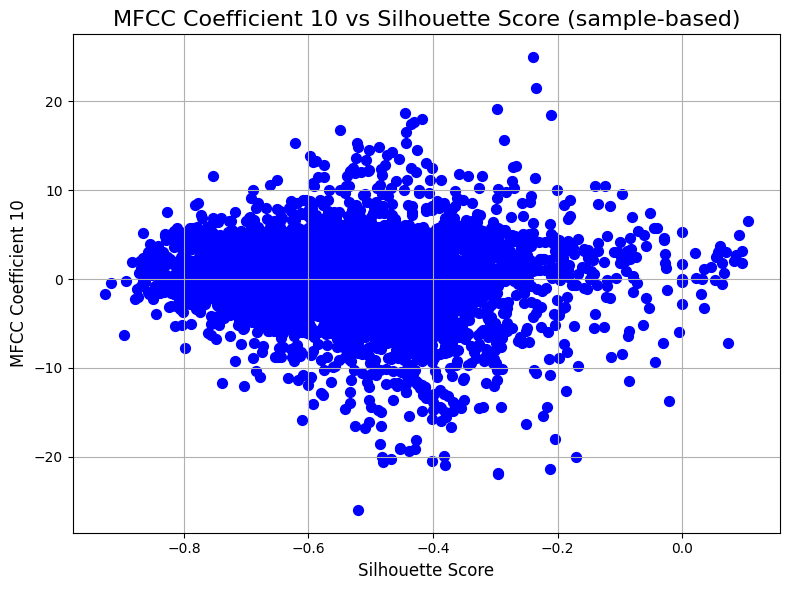

Linear correlation: -0.06397238225917659
Non-linear correlation: -0.053451006923423264


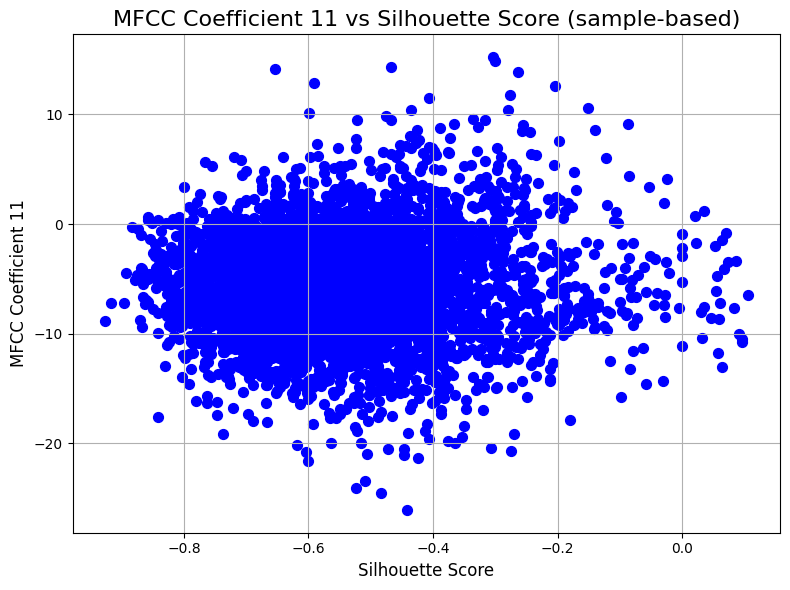

Linear correlation: 0.06273608019967201
Non-linear correlation: 0.05361993157209205


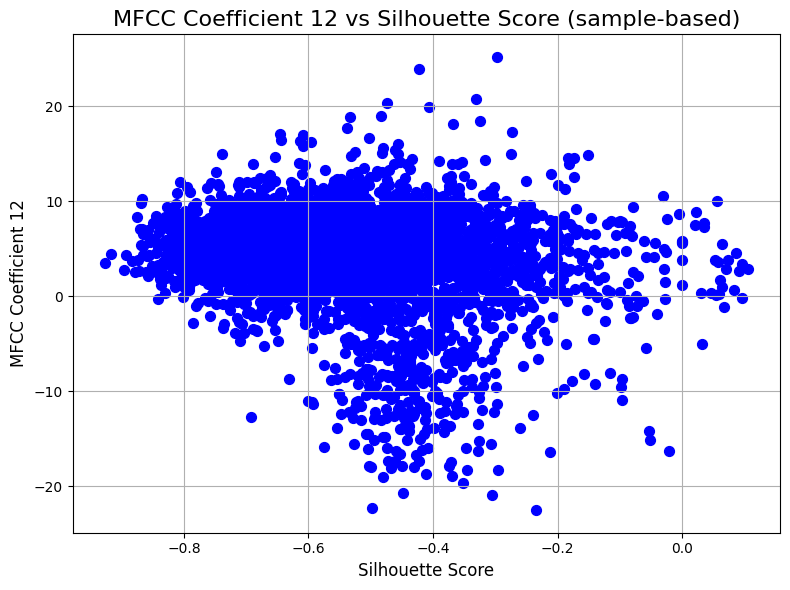

Linear correlation: -0.20285977192708995
Non-linear correlation: -0.1628923817480303


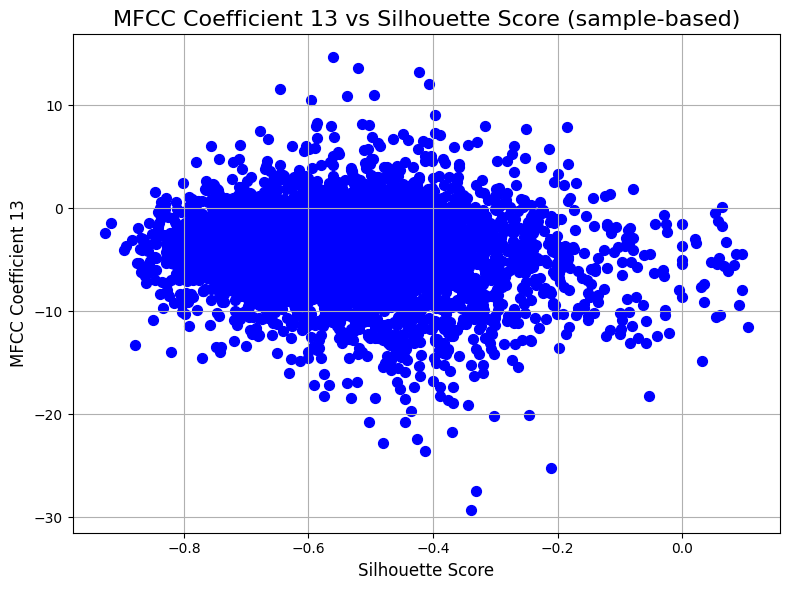

Linear correlation: -0.10230344309504802
Non-linear correlation: -0.0710589619803042


In [44]:
#plot mfccs and the mfcc based silhouette scores based on per sample
#13 plots for 13 coefficients

mfcc_vec_per_sam = np.array(mfcc_vec_per_sam)
sil_mfcc_per_sam = np.array(sil_mfcc_per_sam)

for coeff_idx in range(13):
    plt.figure(figsize=(8, 6))

    plt.scatter(sil_mfcc_per_sam, mfcc_vec_per_sam[:, coeff_idx], color='b', s=50)

    plt.title(f"MFCC Coefficient {coeff_idx + 1} vs Silhouette Score (sample-based)", fontsize=16)
    plt.xlabel("Silhouette Score", fontsize=12)
    plt.ylabel(f"MFCC Coefficient {coeff_idx + 1}", fontsize=12)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    #calculate the linear correlation level (pearson correlation)
    pearson_corr, pearson_p_value = pearsonr(mfcc_vec_per_sam[:, coeff_idx], sil_mfcc_per_sam)
    print(f'Linear correlation: {pearson_corr}')

    #calculate the none-linear correlation level (spearman’s rank correlation)
    spearman_corr, spearman_p_value = spearmanr(mfcc_vec_per_sam[:, coeff_idx], sil_mfcc_per_sam)
    print(f"Non-linear correlation: {spearman_corr}")


STEP 4.2: conduct sample level correlation analysis between mean MFCC values and MFCC-based silhouette scores

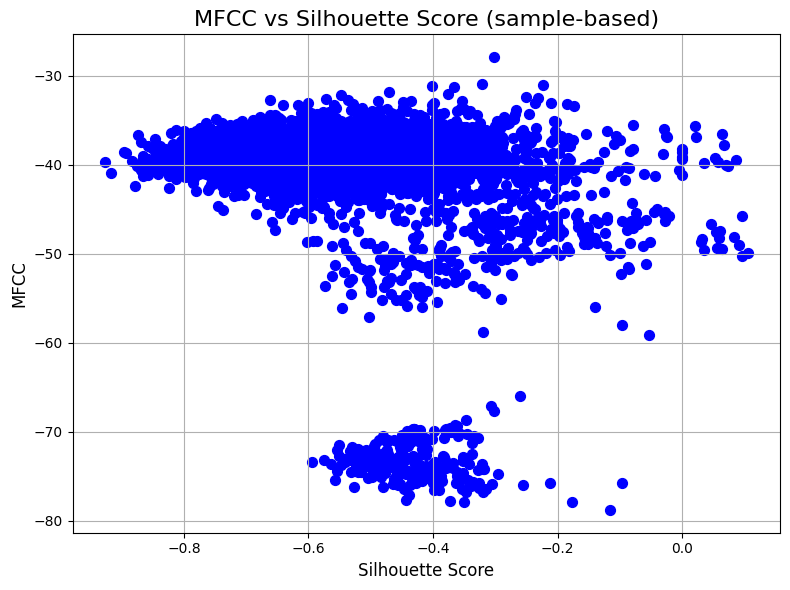

Linear correlation: -0.2511053752597006
Non-linear correlation: -0.15427757897703984


In [45]:
#plot mfccs and mfcc based silhouette scores based on per sample
#one plot, one mean mfcc value per sample
mfcc_val_per_sam = np.array(mfcc_val_per_sam)
sil_mfcc_per_sam = np.array(sil_mfcc_per_sam)

plt.figure(figsize=(8, 6))
plt.scatter(sil_mfcc_per_sam, mfcc_val_per_sam, color='b', s=50)

plt.title(f"MFCC vs Silhouette Score (sample-based)", fontsize=16)
plt.xlabel("Silhouette Score", fontsize=12)
plt.ylabel(f"MFCC", fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

#calculate the linear correlation level (pearson correlation)
pearson_corr, pearson_p_value = pearsonr(mfcc_val_per_sam, sil_mfcc_per_sam)
print(f'Linear correlation: {pearson_corr}')

#calculate the none-linear correlation level (spearman’s rank correlation)
spearman_corr, spearman_p_value = spearmanr(mfcc_val_per_sam, sil_mfcc_per_sam)
print(f"Non-linear correlation: {spearman_corr}")

STEP 4.3: conduct sample level correlation analysis between mean xvector values and xvector-based silhouette scores

(4500,)
(4500,)


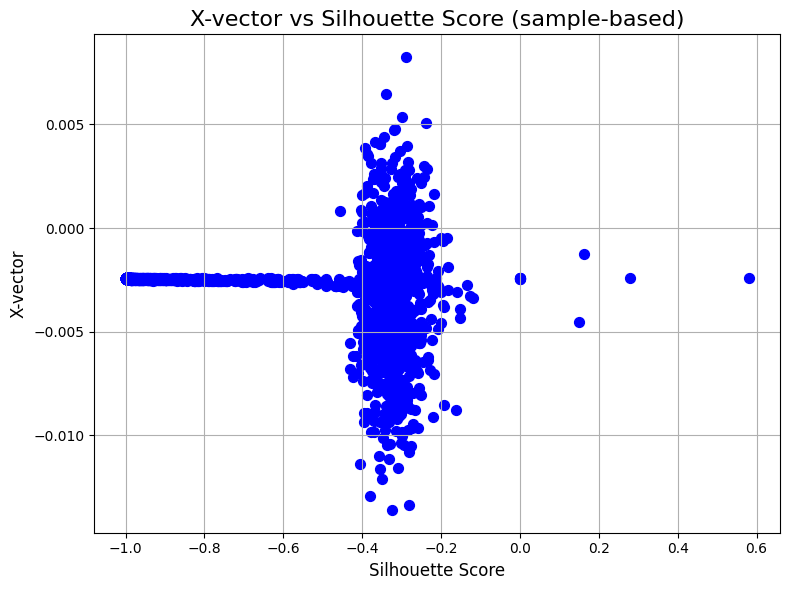

Linear correlation: -0.22482942767012395
Non-linear correlation: -0.4821645475075455


In [46]:
#plot xvectors and xvector based silhouette scores based on per sample

xvector_per_sam = np.array(xvector_per_sam)
sil_xvector_per_sam = np.array(sil_xvector_per_sam)
print(sil_xvector_per_sam.shape)
print(xvector_per_sam.shape)

plt.figure(figsize=(8, 6))
plt.scatter(sil_xvector_per_sam, xvector_per_sam, color='b', s=50)

plt.title(f"X-vector vs Silhouette Score (sample-based)", fontsize=16)
plt.xlabel("Silhouette Score", fontsize=12)
plt.ylabel(f"X-vector", fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

#calculate the linear correlation level (pearson correlation)
speaker_xvector = np.squeeze(speaker_xvector)
pearson_corr, pearson_p_value = pearsonr(xvector_per_sam, sil_xvector_per_sam)
print(f'Linear correlation: {pearson_corr}')

#calculate the none-linear correlation level (spearman’s rank correlation)
spearman_corr, spearman_p_value = spearmanr(xvector_per_sam, sil_xvector_per_sam)
print(f"Non-linear correlation: {spearman_corr}")

STEP 4.4: conduct sample level correlation analysis between mean embedding values and embedding-based silhouette scores

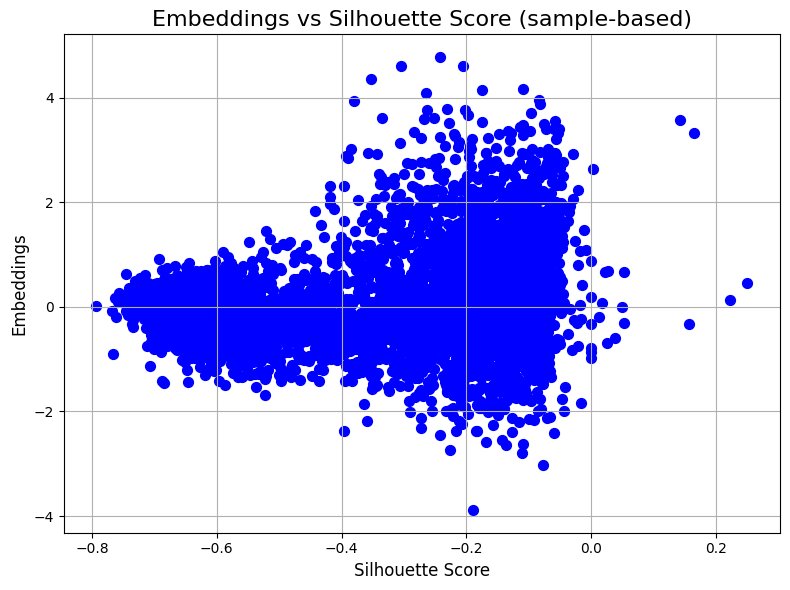

Linear correlation: 0.2231503418612473
Non-linear correlation: 0.21593353212954408


In [47]:
#plot embedding and embedding based silhouette scores based on per sample

embedding_per_sam = np.array(embedding_per_sam)
sil_embedding_per_samp = np.array(sil_embedding_per_samp)
#print(silhouette_speaker_embedding.shape)
#print(speaker_embeddings.shape)

plt.figure(figsize=(8, 6))
plt.scatter(sil_embedding_per_samp, embedding_per_sam, color='b', s=50)

plt.title(f"Embeddings vs Silhouette Score (sample-based)", fontsize=16)
plt.xlabel("Silhouette Score", fontsize=12)
plt.ylabel(f"Embeddings", fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

#calculate the linear correlation level (pearson correlation)
speaker_xvector = np.squeeze(speaker_xvector)
pearson_corr, pearson_p_value = pearsonr(embedding_per_sam, sil_embedding_per_samp)
print(f'Linear correlation: {pearson_corr}')

#calculate the none-linear correlation level (spearman’s rank correlation)
spearman_corr, spearman_p_value = spearmanr(embedding_per_sam, sil_embedding_per_samp)
print(f"Non-linear correlation: {spearman_corr}")